<a href="https://colab.research.google.com/github/Niroth36/Machine_Learning_2nd_Assignment/blob/main/ML_2nd_assignment_itp24108.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Temperature change
### Global Warming, Temperature Change, Climate Change
Dataset from kaggle: https://www.kaggle.com/datasets/sevgisarac/temperature-change

In [19]:
# Load libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import kagglehub

# Load dataset
print("Downloading dataset via KaggleHub...")
path = kagglehub.dataset_download("sevgisarac/temperature-change")
print(f"Dataset path: {path}")

# Find and load the main CSV file
import os
files = os.listdir(path)
csv_file = [f for f in files if f.endswith('.csv') and 'NOFLAG' in f][0]
file_path = os.path.join(path, csv_file)

# Create a DataFrame for analysis
df = pd.read_csv(file_path, encoding='ISO-8859-1')

# Dimensions of the dataset
print(f"Dataset shape (rows, columns): {df.shape}")
print(f"Number of observations: {df.shape[0]}")
print("Each country has 34 rows. (12 months + 4 quarters + 1 whole meteorogical year)")
print("Duplicated for both 'Temperature change' and 'Standard Deviation'")
print(f"Number of variables: {df.shape[1]}")
print(f"Time period covered: 1961-2019 (59 years)")
print(f"\nVariable names {df.shape[1]} in total:")
for i, column in enumerate(df.columns[:]):
    print(f"  {i+1:2d}. {column}")

Dataset path: /root/.cache/kagglehub/datasets/sevgisarac/temperature-change/versions/4
Dataset shape (rows, columns): (9656, 66)
Number of observations: 9656
Each country has 34 rows. (12 months + 4 quarters + 1 whole meteorogical year)
Duplicated for both 'Temperature change' and 'Standard Deviation'
Number of variables: 66
Time period covered: 1961-2019 (59 years)

Variable names 66 in total:
   1. Area Code
   2. Area
   3. Months Code
   4. Months
   5. Element Code
   6. Element
   7. Unit
   8. Y1961
   9. Y1962
  10. Y1963
  11. Y1964
  12. Y1965
  13. Y1966
  14. Y1967
  15. Y1968
  16. Y1969
  17. Y1970
  18. Y1971
  19. Y1972
  20. Y1973
  21. Y1974
  22. Y1975
  23. Y1976
  24. Y1977
  25. Y1978
  26. Y1979
  27. Y1980
  28. Y1981
  29. Y1982
  30. Y1983
  31. Y1984
  32. Y1985
  33. Y1986
  34. Y1987
  35. Y1988
  36. Y1989
  37. Y1990
  38. Y1991
  39. Y1992
  40. Y1993
  41. Y1994
  42. Y1995
  43. Y1996
  44. Y1997
  45. Y1998
  46. Y1999
  47. Y2000
  48. Y2001
  49. Y2

TASK: Time series analysis and regression modeling of temperature changes comparing Greece against global averages (1961-2019)

GOALS:
1. Extract and analyze Greece's temperature change data (1961-2019)
2. Compare Greece's warming trend with World average
3. Identify months/seasons with strongest warming in Greece
4. Build regression models to predict future temperature changes
5. Quantify acceleration of warming in recent decades

## STEP 2: Define Problem

### PRIMARY TASK
**Time series forecasting of temperature anomalies**  
Predict future temperature changes for **Greece** and the **World** *(2020–2030)*

---

### SECONDARY TASK
**Comparative analysis of warming trends**  
Greece vs Global temperature anomalies *(1961–2019)*

---

### DATA INTERPRETATION
- Temperature values are **ANOMALIES** from the **1951–1980 baseline**
- **Positive values** → warmer than 1951–1980 average
- **Negative values** → cooler than 1951–1980 average
- **0°C** → same temperature as 1951–1980 average

---

### PRIMARY GOALS (FORECASTING)
1. Build regression models to forecast temperature anomalies to **2030**
2. Predict **Greece's** temperature anomalies for the next decade
3. Predict **global** temperature anomalies for the next decade
4. Estimate when Greece might reach specific **warming thresholds**
5. Provide **uncertainty estimates** (confidence intervals) for predictions

---

### SECONDARY GOALS (COMPARISON)
1. Compare warming rates: **Greece °C/decade vs World °C/decade**
2. Identify whether the **Mediterranean region (Greece)** is warming faster
3. Analyze **seasonal patterns**: which months warm fastest in Greece
4. Quantify **acceleration of warming** since 1990 vs 1961–1990 period

---

### MACHINE LEARNING APPROACH
- **Time Series Regression:** Year → Temperature anomaly
- **Models to test:** Linear, Polynomial, Exponential regression
- **Forecast horizon:** 2020–2030 *(short-term climate projection)*
- **Validation:** Last 10 years *(2009–2019)* as test set
- **Evaluation metrics:** RMSE, MAE, R²

---

### EXPECTED OUTCOMES
- Forecasted temperature anomalies for **Greece (2020–2030)**
- Forecasted temperature anomalies for **World (2020–2030)**
- Comparison: **Is Greece warming faster than the global average?**
- Prediction: When might Greece reach **+2°C above the 1951–1980 baseline?**
- Seasonal insights: **Summer vs winter warming patterns in Greece**


### A peek at the data. The first three rows.

In [20]:
print("First 3 rows showing structure:")
print(df[['Area', 'Months', 'Element', 'Unit', 'Y1961', 'Y1962', 'Y2019']].head(3))
print("\nLast 3 rows showing structure:")
print(df[['Area', 'Months', 'Element', 'Unit', 'Y1961', 'Y1962', 'Y2019']].tail(3))
print()

First 3 rows showing structure:
          Area    Months             Element Unit  Y1961  Y1962  Y2019
0  Afghanistan   January  Temperature change   °C  0.777  0.062  2.951
1  Afghanistan   January  Standard Deviation   °C  1.950  1.950  1.950
2  Afghanistan  February  Temperature change   °C -1.743  2.465  0.086

Last 3 rows showing structure:
      Area               Months             Element Unit  Y1961  Y1962  Y2019
9653  OECD          SepOctNov  Standard Deviation   °C  0.378  0.378  0.378
9654  OECD  Meteorological year  Temperature change   °C  0.165 -0.009  1.297
9655  OECD  Meteorological year  Standard Deviation   °C  0.260  0.260  0.260



### Some basic information about the dataset.

In [21]:
print("Data types:")
print(df.dtypes)
print()

print("Unique values count:")
print(f"Areas: {df['Area'].nunique()} unique countries/regions")
print(f"Months: {df['Months'].nunique()} time periods")
print(f"Elements: {df['Element'].nunique()} measurement types")
print(f"Units: {df['Unit'].nunique()} units of measurement")
print()

Data types:
Area Code         int64
Area             object
Months Code       int64
Months           object
Element Code      int64
                 ...   
Y2015           float64
Y2016           float64
Y2017           float64
Y2018           float64
Y2019           float64
Length: 66, dtype: object

Unique values count:
Areas: 284 unique countries/regions
Months: 17 time periods
Elements: 2 measurement types
Units: 1 units of measurement



### Focus on Greece and World data

In [22]:
# Find exact names
greece_name = [area for area in df['Area'].unique() if 'greece' in str(area).lower()][0]
world_name = [area for area in df['Area'].unique() if 'world' in str(area).lower()][0]

print(f"Greece entry: '{greece_name}'")
print(f"World entry: '{world_name}'")
print()

# Extract Greece and World data
greece_df = df[df['Area'] == greece_name]
world_df = df[df['Area'] == world_name]

print(f"Greece rows: {len(greece_df)}")
print(f"World rows: {len(world_df)}")
print()

# Show structure
print("Greece data structure (Months × Elements):")
print(greece_df[['Months', 'Element']].to_string(index=False))
print()

Greece entry: 'Greece'
World entry: 'World'

Greece rows: 34
World rows: 34

Greece data structure (Months × Elements):
             Months            Element
            January Temperature change
            January Standard Deviation
           February Temperature change
           February Standard Deviation
              March Temperature change
              March Standard Deviation
              April Temperature change
              April Standard Deviation
                May Temperature change
                May Standard Deviation
               June Temperature change
               June Standard Deviation
               July Temperature change
               July Standard Deviation
             August Temperature change
             August Standard Deviation
          September Temperature change
          September Standard Deviation
            October Temperature change
            October Standard Deviation
           November Temperature change
           November St

### Descriptive Statistics

In [23]:
# Get year columns
year_cols = [col for col in df.columns if col.startswith('Y')]

# Convert to numeric and calculate stats
print("\nGlobal temperature anomalies statistics (all countries, annual data):")
annual_data = df[(df['Months'] == 'Meteorological year') & (df['Element'] == 'Temperature change')]

stats_dict = {}
for year in ['Y1961', 'Y1970', 'Y1980', 'Y1990', 'Y2000', 'Y2010', 'Y2019']:
    values = pd.to_numeric(annual_data[year], errors='coerce')
    stats_dict[year] = {
        'mean': values.mean(),
        'std': values.std(),
        'min': values.min(),
        'max': values.max()
    }
    print(f"{year}: Mean={values.mean():.3f}°C, Std={values.std():.3f}, "
          f"Range=[{values.min():.3f}, {values.max():.3f}]")

print()


Global temperature anomalies statistics (all countries, annual data):
Y1961: Mean=0.171°C, Std=0.408, Range=[-0.688, 1.906]
Y1970: Mean=0.079°C, Std=0.341, Range=[-1.284, 0.982]
Y1980: Mean=0.246°C, Std=0.342, Range=[-0.762, 0.967]
Y1990: Mean=0.573°C, Std=0.459, Range=[-0.703, 1.835]
Y2000: Mean=0.668°C, Std=0.523, Range=[-0.778, 2.075]
Y2010: Mean=1.122°C, Std=0.596, Range=[-0.328, 3.042]
Y2019: Mean=1.443°C, Std=0.475, Range=[0.082, 2.903]





* Mean shows the average global temperature anomaly (°C from 1951-1980 baseline)
* Std is the standard deviation and shows how much variation exists between different countries
* Range shows the minimum and maximum anomaly values among all countries


Key insights comning from descriptive analysis
* Global warming is clear: Mean increased from 0.17°C (1961) to 1.44°C (2019)

* Variation increased: Standard deviation grew from 0.41 to 0.48, showing some countries warming faster than others

* No negative anomalies in 2019: All countries were above baseline (min = 0.082°C)




### Greece specific analysis

In [24]:
# Get Greece annual temperature data
greece_annual = greece_df[(greece_df['Months'] == 'Meteorological year') &
                          (greece_df['Element'] == 'Temperature change')]

world_annual = world_df[(world_df['Months'] == 'Meteorological year') &
                       (world_df['Element'] == 'Temperature change')]

print("Greece vs World temperature anomalies (°C from 1951-1980 baseline):")
print("Year  Greece  World  Difference")
print("-" * 35)

for year in ['Y1961', 'Y1975', 'Y1990', 'Y2005', 'Y2019']:
    g_val = pd.to_numeric(greece_annual[year].iloc[0], errors='coerce') if not greece_annual.empty else None
    w_val = pd.to_numeric(world_annual[year].iloc[0], errors='coerce') if not world_annual.empty else None

    if g_val is not None and w_val is not None:
        diff = g_val - w_val
        print(f"{year[1:]}   {g_val:6.2f}   {w_val:6.2f}   {diff:6.2f}")
print()

Greece vs World temperature anomalies (°C from 1951-1980 baseline):
Year  Greece  World  Difference
-----------------------------------
1961     0.47     0.21     0.26
1975    -0.24     0.09    -0.33
1990     0.41     0.64    -0.23
2005     0.31     1.10    -0.79
2019     1.49     1.47     0.02



* Shows Greece's temperature anomaly vs global average for selected years

* Positive difference = Greece warmer than world average

* Negative difference = Greece cooler than world average

Key insights:

* 1961: Greece was already 0.26°C warmer than global average

* 1975: Greece experienced cooling while world warmed slightly

* 2019: Greece (1.49°C) and world (1.47°C) have nearly identical warming

### Trend analysis

In [25]:
# Calculate decadal averages
print("Decadal averages for Greece and World:")
decades = {
    '1961-1970': ['Y1961', 'Y1962', 'Y1963', 'Y1964', 'Y1965', 'Y1966', 'Y1967', 'Y1968', 'Y1969', 'Y1970'],
    '1971-1980': [f'Y{year}' for year in range(1971, 1981)],
    '1981-1990': [f'Y{year}' for year in range(1981, 1991)],
    '1991-2000': [f'Y{year}' for year in range(1991, 2001)],
    '2001-2010': [f'Y{year}' for year in range(2001, 2011)],
    '2011-2019': [f'Y{year}' for year in range(2011, 2020)]
}

print("\nDecade       Greece (°C)   World (°C)   Difference")
print("-" * 45)

for decade, years in decades.items():
    greece_vals = []
    world_vals = []

    for year in years:
        if year in greece_annual.columns and year in world_annual.columns:
            g_val = pd.to_numeric(greece_annual[year].iloc[0], errors='coerce')
            w_val = pd.to_numeric(world_annual[year].iloc[0], errors='coerce')

            if not pd.isna(g_val):
                greece_vals.append(g_val)
            if not pd.isna(w_val):
                world_vals.append(w_val)

    if greece_vals and world_vals:
        g_avg = np.mean(greece_vals)
        w_avg = np.mean(world_vals)
        diff = g_avg - w_avg
        print(f"{decade}   {g_avg:11.3f}   {w_avg:10.3f}   {diff:10.3f}")

print()

Decadal averages for Greece and World:

Decade       Greece (°C)   World (°C)   Difference
---------------------------------------------
1961-1970         0.174       -0.005        0.179
1971-1980        -0.237        0.042       -0.279
1981-1990        -0.046        0.320       -0.366
1991-2000         0.231        0.584       -0.353
2001-2010         0.798        1.010       -0.212
2011-2019         1.233        1.265       -0.032



* Decade averages smooth out year-to-year variations

* Shows long-term trends more clearly

* Difference = Greece anomaly minus World anomaly

Key insights:

* 1960s: Greece warmer than world (+0.18°C difference)

* 1970s-2000s: Greece cooler than world (negative differences)

* Recent decade: Gap closed to almost zero (-0.03°C difference)

* Overall trend: Both show strong warming, but Greece's pattern differs

Visualizations

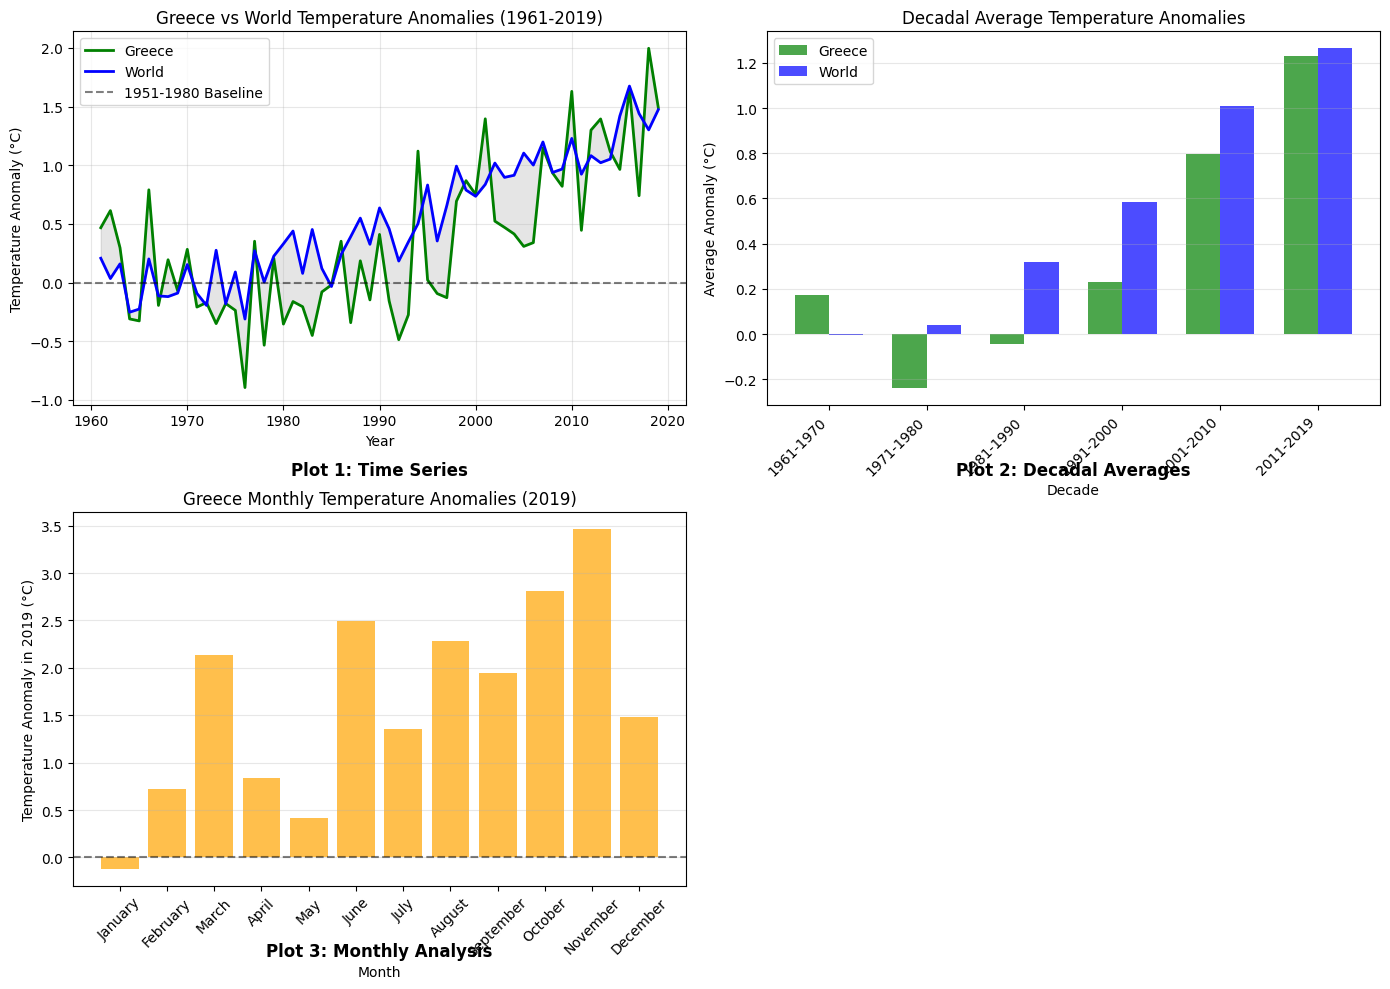

In [26]:
# Set up figure with only 3 plots
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Hide the 4th plot (bottom right)
axes[1, 1].set_visible(False)

# 7.1 Greece vs World Time Series (1961-2019)
if not greece_annual.empty and not world_annual.empty:
    years = [int(col[1:]) for col in year_cols]
    greece_vals = [pd.to_numeric(greece_annual[col].iloc[0], errors='coerce') for col in year_cols]
    world_vals = [pd.to_numeric(world_annual[col].iloc[0], errors='coerce') for col in year_cols]

    axes[0, 0].plot(years, greece_vals, 'g-', linewidth=2, label='Greece')
    axes[0, 0].plot(years, world_vals, 'b-', linewidth=2, label='World')
    axes[0, 0].axhline(y=0, color='black', linestyle='--', alpha=0.5, label='1951-1980 Baseline')
    axes[0, 0].fill_between(years, greece_vals, world_vals, alpha=0.2, color='gray')
    axes[0, 0].set_xlabel('Year')
    axes[0, 0].set_ylabel('Temperature Anomaly (°C)')
    axes[0, 0].set_title('Greece vs World Temperature Anomalies (1961-2019)')
    axes[0, 0].legend()
    axes[0, 0].grid(True, alpha=0.3)

    # Add label for plot 1
    axes[0, 0].text(0.5, -0.15, 'Plot 1: Time Series', transform=axes[0, 0].transAxes,
                    ha='center', va='top', fontsize=12, fontweight='bold')

# 7.2 Decadal Averages Bar Chart
decade_labels = list(decades.keys())
greece_decade_avgs = []
world_decade_avgs = []

for years in decades.values():
    g_vals = [pd.to_numeric(greece_annual[col].iloc[0], errors='coerce') for col in years if col in greece_annual.columns]
    w_vals = [pd.to_numeric(world_annual[col].iloc[0], errors='coerce') for col in years if col in world_annual.columns]
    greece_decade_avgs.append(np.nanmean(g_vals))
    world_decade_avgs.append(np.nanmean(w_vals))

x = np.arange(len(decade_labels))
width = 0.35
axes[0, 1].bar(x - width/2, greece_decade_avgs, width, label='Greece', color='green', alpha=0.7)
axes[0, 1].bar(x + width/2, world_decade_avgs, width, label='World', color='blue', alpha=0.7)
axes[0, 1].set_xlabel('Decade')
axes[0, 1].set_ylabel('Average Anomaly (°C)')
axes[0, 1].set_title('Decadal Average Temperature Anomalies')
axes[0, 1].set_xticks(x)
axes[0, 1].set_xticklabels(decade_labels, rotation=45, ha='right')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3, axis='y')

# Add label for plot 2
axes[0, 1].text(0.5, -0.15, 'Plot 2: Decadal Averages', transform=axes[0, 1].transAxes,
                ha='center', va='top', fontsize=12, fontweight='bold')

# 7.3 Monthly Analysis (Latest Year)
latest_year = 'Y2019'
greece_monthly = greece_df[(greece_df['Element'] == 'Temperature change') &
                           (greece_df['Months'].isin(['January', 'February', 'March', 'April', 'May', 'June',
                                                      'July', 'August', 'September', 'October', 'November', 'December']))]

if not greece_monthly.empty and latest_year in greece_monthly.columns:
    monthly_vals = []
    month_order = ['January', 'February', 'March', 'April', 'May', 'June',
                   'July', 'August', 'September', 'October', 'November', 'December']

    for month in month_order:
        month_data = greece_monthly[greece_monthly['Months'] == month]
        if not month_data.empty:
            val = pd.to_numeric(month_data[latest_year].iloc[0], errors='coerce')
            monthly_vals.append(val)
        else:
            monthly_vals.append(np.nan)

    axes[1, 0].bar(month_order, monthly_vals, color='orange', alpha=0.7)
    axes[1, 0].axhline(y=0, color='black', linestyle='--', alpha=0.5)
    axes[1, 0].set_xlabel('Month')
    axes[1, 0].set_ylabel(f'Temperature Anomaly in {latest_year[1:]} (°C)')
    axes[1, 0].set_title(f'Greece Monthly Temperature Anomalies ({latest_year[1:]})')
    axes[1, 0].tick_params(axis='x', rotation=45)
    axes[1, 0].grid(True, alpha=0.3, axis='y')

    # Add label for plot 3
    axes[1, 0].text(0.5, -0.15, 'Plot 3: Monthly Analysis', transform=axes[1, 0].transAxes,
                    ha='center', va='top', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

### Plot 1: Greece vs World Time Series (1961-2019)
Shows: Year-by-year temperature anomalies for both

Extract:

* Both follow similar upward trend

* Greece shows more year-to-year variability

* World line is smoother (global averaging effect)

* Gap between them changes over time

### Plot 2: Decadal Averages Bar Chart
Shows: Average warming per decade

Extract:

* Clear acceleration: each decade warmer than previous

* 2010s are dramatically warmer than 1960s

* Bars visually show the "warming staircase"

### Plot 3: Greece Monthly Analysis (2019)
Shows: Which months in 2019 were warmest relative to baseline

Extract:

* Some months much warmer than others

* Shows seasonal patterns in warming

* Helps identify "hot seasons" in Greece

### Clean and Align Data

In [27]:
# Ensure Greece and World data have same years
greece_years = [int(col[1:]) for col in year_cols if col in greece_annual.columns]
world_years = [int(col[1:]) for col in year_cols if col in world_annual.columns]
common_years = sorted(set(greece_years) & set(world_years))

# Extract aligned data
X = np.array(common_years).reshape(-1, 1)  # Years as feature
y_greece = np.array([pd.to_numeric(greece_annual[f'Y{year}'].iloc[0], errors='coerce')
                     for year in common_years])
y_world = np.array([pd.to_numeric(world_annual[f'Y{year}'].iloc[0], errors='coerce')
                    for year in common_years])

print(f"\n1. Aligned Data: {len(common_years)} years ({min(common_years)}-{max(common_years)})")


1. Aligned Data: 59 years (1961-2019)


Make sure that Greece and World data are aligned and have the same years so I can compare them properly.

### Create Useful Features

In [28]:
from sklearn.preprocessing import PolynomialFeatures

# Feature 1: Time index (0, 1, 2, ...)
time_index = np.arange(len(common_years)).reshape(-1, 1)

# Feature 2: Decades (categorical feature)
decade_feature = (np.array(common_years) // 10 * 10).reshape(-1, 1)

# Feature 3: Polynomial terms for non-linear trends
poly = PolynomialFeatures(degree=3, include_bias=False)
X_poly = poly.fit_transform(time_index)

print(f"2. Created Features:")
print(f"   - Time index (linear trend)")
print(f"   - Decade groups")
print(f"   - Polynomial terms (degree 3)")

2. Created Features:
   - Time index (linear trend)
   - Decade groups
   - Polynomial terms (degree 3)


Created features
Time index
* converted years 1961-2019 to 0-58
* regression models work better with smaller, centered numbers

Decade groups
* grouped years into 1960s, 1970s, etc
* to capture period-specific effects (policy changes, industrial shifts)
* warming accelerated post-1990s, decades show different trends

Polynominal terms
* create x², x³ terms from time index
* temperature rise isn't perfectly linear - it's accelerating as we see in the plot

### Train-Test Split (Time Series - No Random Shuffling)

In [29]:
# Last 15% for testing (temporal order preserved)
split_idx = int(len(common_years) * 0.85)

X_train = time_index[:split_idx]
X_test = time_index[split_idx:]

y_greece_train = y_greece[:split_idx]
y_greece_test = y_greece[split_idx:]

y_world_train = y_world[:split_idx]
y_world_test = y_world[split_idx:]

print(f"\n3. Train-Test Split:")
print(f"   Training: {len(X_train)} years ({common_years[0]}-{common_years[split_idx-1]})")
print(f"   Testing: {len(X_test)} years ({common_years[split_idx]}-{common_years[-1]})")


3. Train-Test Split:
   Training: 50 years (1961-2010)
   Testing: 9 years (2011-2019)


### Prepare for Forecasting to 2030

In [30]:
# Create future years for prediction
future_years = np.arange(2020, 2031).reshape(-1, 1)
future_time_idx = np.arange(len(common_years), len(common_years) + len(future_years)).reshape(-1, 1)

print(f"\n4. Forecasting Setup:")
print(f"   Will predict for years: {list(future_years.flatten())}")

print("\n" + "=" * 40)
print("Data ready for modeling ✓")
print("=" * 40)


4. Forecasting Setup:
   Will predict for years: [np.int64(2020), np.int64(2021), np.int64(2022), np.int64(2023), np.int64(2024), np.int64(2025), np.int64(2026), np.int64(2027), np.int64(2028), np.int64(2029), np.int64(2030)]

Data ready for modeling ✓


* extend time index from 59-69 (for years 2020-2030)

* trained on time index 0-58 (1961-2019), now predict for index 59-69

## Step 6: Algorithm Selection
Select a set of algorithms to apply, select evaluation metrics, and evaluate/compare algorithms.

## Step 7: Model Training
Apply ensembles and improve performance by hyperparameter optimisation.

## Step 8: Finalise Model
Predictions on validation set, create model from the entire (training) dataset.